In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import scipy.sparse as sp
import matplotlib.pyplot as plt
from matplotlib import cm
import libertem
from libertem import api

In [3]:
%precision 4

'%.4f'

In [4]:
ctx = api.Context()

/home/weber/miniconda3/envs/libertem39/lib/python3.9/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46835 instead
  warnings.warn(
2023-01-12 17:55:26,017 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space-20335/worker-fhzzmyyy', purging
2023-01-12 17:55:26,017 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space-20335/worker-40w7w1of', purging
2023-01-12 17:55:26,017 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space-20335/worker-fqm4gpm6', purging
2023-01-12 17:55:26,017 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space-20335/worker-jr6ovhj0', purging
2023-01-12 17:55:26,018 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space-20335/worker-oflonzc8', purging
2023-01-12 17:

2023-01-12 17:55:26,355 - distributed.preloading - INFO - Creating preload: from libertem.executor.dask import worker_setup; worker_setup(resource="CPU", device=14)
2023-01-12 17:55:26,356 - distributed.utils - INFO - Reload module tmpmnraiwzb from .py file
2023-01-12 17:55:26,365 - distributed.preloading - INFO - Import preload module: /tmp/tmpg8o2dqs1.py
2023-01-12 17:55:26,365 - distributed.preloading - INFO - Creating preload: from libertem.common.tracing import maybe_setup_tracing; maybe_setup_tracing(service_name='default-cpu-20', service_id='20')
2023-01-12 17:55:26,366 - distributed.utils - INFO - Reload module tmpg3tji4i5 from .py file
2023-01-12 17:55:26,366 - distributed.preloading - INFO - Import preload module: /tmp/tmpg3tji4i5.py
2023-01-12 17:55:26,366 - distributed.preloading - INFO - Creating preload: libertem.preload
2023-01-12 17:55:26,381 - distributed.preloading - INFO - Creating preload: from libertem.executor.dask import worker_setup; worker_setup(resource="CPU",

2023-01-12 17:55:26,560 - distributed.preloading - INFO - Import preload module: libertem.preload
2023-01-12 17:55:26,563 - distributed.preloading - INFO - Import preload module: libertem.preload
2023-01-12 17:55:26,563 - distributed.preloading - INFO - Import preload module: libertem.preload
2023-01-12 17:55:26,573 - distributed.preloading - INFO - Import preload module: libertem.preload
2023-01-12 17:55:26,576 - distributed.preloading - INFO - Import preload module: /tmp/tmp2ynymvwl.py
2023-01-12 17:55:26,576 - distributed.preloading - INFO - Creating preload: from libertem.common.tracing import maybe_setup_tracing; maybe_setup_tracing(service_name='default-cpu-12', service_id='12')
2023-01-12 17:55:26,577 - distributed.utils - INFO - Reload module tmpy6np9dy6 from .py file
2023-01-12 17:55:26,577 - distributed.preloading - INFO - Import preload module: /tmp/tmpy6np9dy6.py
2023-01-12 17:55:26,577 - distributed.preloading - INFO - Creating preload: libertem.preload
2023-01-12 17:55:26

2023-01-12 17:55:26,768 - distributed.preloading - INFO - Import preload module: libertem.preload
2023-01-12 17:55:26,770 - distributed.preloading - INFO - Import preload module: libertem.preload
2023-01-12 17:55:26,793 - distributed.preloading - INFO - Import preload module: libertem.preload
2023-01-12 17:55:26,807 - distributed.preloading - INFO - Import preload module: libertem.preload


In [5]:
data_base_path = os.environ.get("TESTDATA_BASE_PATH", "/home/alex/Data/")

In [6]:
ds = ctx.load(
    "auto",
    path=os.path.join(data_base_path, "EMPAD/acquisition_12_full.xml"),
)
(scan_y, scan_x, detector_y, detector_x) = ds.shape
mask_shape = np.array((detector_y, detector_x))
cx = detector_x/2
cy = detector_y/2
y = scan_y//2
x = scan_x//2

2023-01-12 17:55:27,293 - distributed.worker - WARNING - Compute Failed
Key:       _do_detect-34a9707c-6517-41a2-a1a3-411bde37e992
Function:  _do_detect
args:      ()
kwargs:    {}
Exception: 'DataSetException("OSError(\'Unable to open file (file signature not found)\')")'

2023-01-12 17:55:27,386 - distributed.worker - WARNING - Compute Failed
Key:       check_valid-d89bf4ec-b0d5-470a-a168-a6c035c4180e
Function:  check_valid
args:      ()
kwargs:    {}
Exception: "DataSetException('invalid magic number: 6576 != 102')"

2023-01-12 17:55:27,772 - distributed.worker - WARNING - Compute Failed
Key:       get_filenames-a21ee093-25a4-46d8-915e-51b1beafb291
Function:  get_filenames
args:      ()
kwargs:    {}
Exception: "DataSetException('unknown extension: .xml')"

2023-01-12 17:55:27,863 - distributed.worker - WARNING - Compute Failed
Key:       _get_base_filename-926e910e-6469-4813-9c38-42805fc80000
Function:  _get_base_filename
args:      ()
kwargs:    {}
Exception: "DataSetException('un

In [7]:
pick_analysis = ctx.create_pick_analysis(dataset=ds, x=x, y=y)

In [8]:
%time pick_result = ctx.run(pick_analysis, progress=True)

Partitions 0/1, Frames:   0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 298 ms, sys: 6.13 ms, total: 304 ms
Wall time: 736 ms


In [9]:
print(pick_result)

[<AnalysisResult: intensity>, <AnalysisResult: intensity_lin>]


In [10]:
# NBVAL_IGNORE_OUTPUT
print(pick_result.intensity)

title: intensity [log]
desc: the frame at x=128 y=128 log-scaled
key: intensity
raw_data: [[-8.1389e+00  2.7839e+02  1.2186e+02 ... -4.4079e+00  9.1751e+00
   3.6139e+02]
 [ 3.3432e+02  8.8130e+01  1.3434e+01 ...  5.2451e+00  3.8717e+02
   3.1518e+02]
 [ 1.8974e+02  4.5217e+02  2.1674e+02 ...  5.0107e-02  2.2460e+00
   6.6428e+01]
 ...
 [ 1.9781e+00 -1.1610e+00  3.7980e+00 ... -1.3129e+00 -4.0329e+00
   8.7018e+01]
 [ 3.9335e+02  1.7177e+01 -4.5100e+00 ...  4.2446e+02  7.2101e+00
  -8.6286e-01]
 [ 3.9165e+02  1.7034e+01 -5.5129e+00 ...  4.2316e+02  6.5401e+00
  -7.0392e-01]]
visualized: [[[ 48 128 126 255]
  [121 166  82 255]
  [ 82 157  72 255]
  ...
  [ 50 131 120 255]
  [ 56 137 106 255]
  [131 169  84 255]]

 [[128 168  83 255]
  [ 69 153  72 255]
  [ 57 139 103 255]
  ...
  [ 54 136 110 255]
  [133 169  84 255]
  [126 167  83 255]]

 [[104 163  78 255]
  [140 171  85 255]
  [109 163  79 255]
  ...
  [ 52 133 115 255]
  [ 53 134 112 255]
  [ 66 151  78 255]]

 ...

 [[ 53 134 112 2

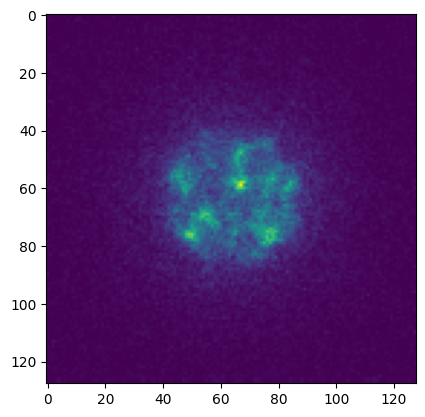

In [11]:
fig, axes = plt.subplots()
axes.imshow(pick_result.intensity.raw_data)

In [12]:
def all_ones():
    return np.ones((detector_y, detector_x))

In [13]:
def single_pixel():
    buf = np.zeros((detector_y, detector_x))
    buf[int(cy), int(cx)] = 1
    return buf

Here we use a mask UDF. This UDF uses the LiberTEM computation rather directly and returns a simple numerical result. See further below for examples that use the high-level analysis interface instead.

In [14]:
mask_udf = libertem.udf.masks.ApplyMasksUDF(mask_factories=[all_ones, single_pixel])

In [15]:
%%time
mask_udf_result = ctx.run_udf(dataset=ds, udf=mask_udf, progress=True)

Partitions 0/24, Frames:   0%|          | 0/65536 [00:00<?, ?it/s]

CPU times: user 318 ms, sys: 11.5 ms, total: 329 ms
Wall time: 1.4 s


In [16]:
print(mask_udf_result)

{'intensity': <BufferWrapper kind=nav dtype=float64 extra_shape=(2,)>}


In [17]:
print(mask_udf_result['intensity'])

<BufferWrapper kind=nav dtype=float64 extra_shape=(2,)>


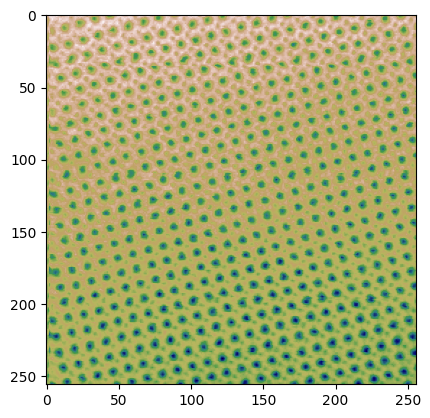

In [18]:
fig, axes = plt.subplots()
axes.imshow(mask_udf_result['intensity'].data[..., 0], cmap=cm.gist_earth)

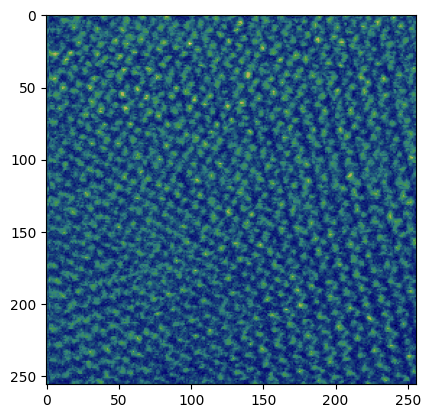

In [19]:
fig, axes = plt.subplots()
axes.imshow(mask_udf_result['intensity'].data[..., 1], cmap=cm.gist_earth)

In [20]:
mask_analysis = ctx.create_mask_analysis(dataset=ds, factories=[all_ones, single_pixel])

In [21]:
%time mask_analysis_result = ctx.run(mask_analysis, progress=True)

Partitions 0/24, Frames:   0%|          | 0/65536 [00:00<?, ?it/s]

CPU times: user 190 ms, sys: 2.77 ms, total: 192 ms
Wall time: 407 ms


In [22]:
print(mask_analysis_result)

[<AnalysisResult: mask_0>, <AnalysisResult: mask_1>]


In [23]:
# NBVAL_IGNORE_OUTPUT
print(mask_analysis_result[0])

title: mask 0
desc: integrated intensity for mask 0
key: mask_0
raw_data: [[27850324.4647 28474082.4509 29206838.6794 ... 28496849.7669
  28388546.927  28217773.007 ]
 [28612171.7066 28955478.9061 29521825.3989 ... 28629364.4383
  28697176.7665 28371276.0654]
 [28774531.5103 28422556.4079 29332136.6659 ... 28734413.2553
  28855773.9464 28983199.2062]
 ...
 [26167279.0255 27059745.2544 27660706.177  ... 27118113.3879
  27208242.4221 27266392.256 ]
 [26604566.9983 27274427.7075 27053773.3009 ... 26818205.9628
  26966513.0464 26932802.8792]
 [26721508.9678 27176442.751  26789558.9248 ... 26511140.4287
  27037473.0653 27278705.8884]]
visualized: [[[186 175  96 255]
  [200 166 120 255]
  [229 199 187 255]
  ...
  [201 167 123 255]
  [197 164 113 255]
  [191 164 100 255]]

 [[206 171 132 255]
  [219 183 162 255]
  [241 222 220 255]
  ...
  [207 172 135 255]
  [209 173 140 255]
  [197 164 113 255]]

 [[212 176 147 255]
  [198 165 115 255]
  [235 209 202 255]
  ...
  [211 175 145 255]
  [216 1

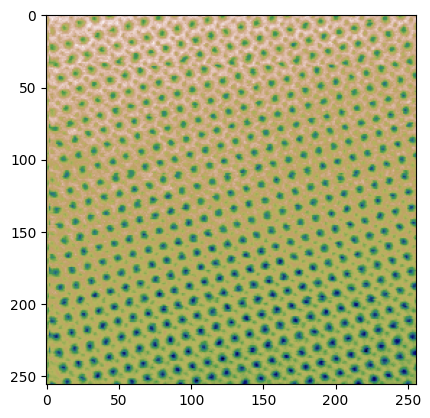

In [24]:
fig, axes = plt.subplots()
axes.imshow(mask_analysis_result[0].visualized)

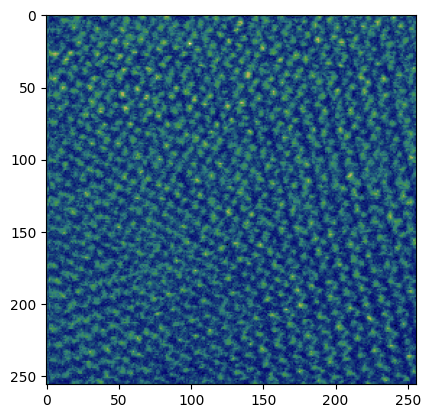

In [25]:
fig, axes = plt.subplots()
axes.imshow(mask_analysis_result[1].visualized)

In [26]:
ro = min(detector_x,detector_y)/2
haadf_analysis = ctx.create_ring_analysis(dataset=ds, cx=cx, cy=cy, ro=ro, ri=ro*0.8)

In [27]:
%time haadf_result = ctx.run(haadf_analysis, progress=True)

Partitions 0/24, Frames:   0%|          | 0/65536 [00:00<?, ?it/s]

CPU times: user 115 ms, sys: 21.2 ms, total: 136 ms
Wall time: 149 ms


In [28]:
print(haadf_result)

[<AnalysisResult: intensity>, <AnalysisResult: intensity_log>]


In [29]:
# NBVAL_IGNORE_OUTPUT
print(haadf_result.intensity)

title: intensity [lin]
desc: intensity of the integration over the selected ring lin-scaled
key: intensity
raw_data: [[1430498.1 1472582.9 1331891.1 ... 1406989.2 1441294.2 1464622.6]
 [1390670.5 1441177.1 1347792.6 ... 1302910.8 1314042.2 1347872.8]
 [1407067.9 1564187.4 1444740.4 ... 1396888.  1321350.9 1317518.8]
 ...
 [1905181.5 1706497.4 1620345.5 ... 1792412.9 1785900.2 1752096.8]
 [1795231.5 1651401.  1675191.6 ... 1867160.6 1833695.5 1820662. ]
 [1758158.  1666727.8 1691829.6 ... 1918684.9 1812730.1 1776172.4]]
visualized: [[[ 38 105 125 255]
  [ 43 118 126 255]
  [ 25  69 121 255]
  ...
  [ 35  97 124 255]
  [ 39 109 125 255]
  [ 43 116 126 255]]

 [[ 33  92 123 255]
  [ 39 109 125 255]
  [ 27  75 121 255]
  ...
  [ 21  56 120 255]
  [ 22  60 120 255]
  [ 27  75 121 255]]

 [[ 35  97 124 255]
  [ 54 135 111 255]
  [ 40 110 125 255]
  ...
  [ 33  94 123 255]
  [ 23  64 121 255]
  [ 23  62 120 255]]

 ...

 [[145 172  86 255]
  [ 67 152  76 255]
  [ 59 141  98 255]
  ...
  [102 

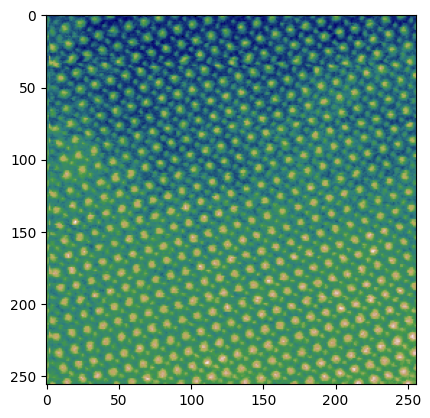

In [30]:
fig, axes = plt.subplots()
axes.imshow(haadf_result.intensity.visualized)

In [31]:
bf_analysis = ctx.create_disk_analysis(dataset=ds, cx=cx, cy=cy, r=ro*0.3)

In [32]:
%time bf_result = ctx.run(bf_analysis, progress=True)

Partitions 0/24, Frames:   0%|          | 0/65536 [00:00<?, ?it/s]

CPU times: user 137 ms, sys: 5.53 ms, total: 143 ms
Wall time: 141 ms


In [33]:
print(bf_result)

[<AnalysisResult: intensity>, <AnalysisResult: intensity_log>]


In [34]:
# NBVAL_IGNORE_OUTPUT
print(bf_result.intensity)

title: intensity [lin]
desc: intensity of the integration over the selected disk lin-scaled
key: intensity
raw_data: [[11855892. 12050525. 13056826. ... 12369484. 11876224. 11598536.]
 [12859636. 12649296. 13449516. ... 12338372. 12118210. 11864102.]
 [13009234. 11589958. 12699814. ... 12133116. 12087128. 12033632.]
 ...
 [ 9925932. 10641335. 11301420. ... 10896898. 11075714. 11224717.]
 [10470584. 11345229. 10838043. ... 10156356. 10719042. 10770757.]
 [10751518. 11299932. 10408881. ...  9766378. 10741136. 10775174.]]
visualized: [[[173 180  92 255]
  [181 182  93 255]
  [199 166 118 255]
  ...
  [186 175  96 255]
  [173 180  92 255]
  [159 176  89 255]]

 [[192 163 103 255]
  [190 168  99 255]
  [212 176 147 255]
  ...
  [186 175  96 255]
  [183 181  94 255]
  [173 180  92 255]]

 [[198 165 115 255]
  [159 176  89 255]
  [190 167  99 255]
  ...
  [183 181  94 255]
  [182 182  94 255]
  [181 182  93 255]]

 ...

 [[ 67 152  76 255]
  [111 164  79 255]
  [145 172  86 255]
  ...
  [125 

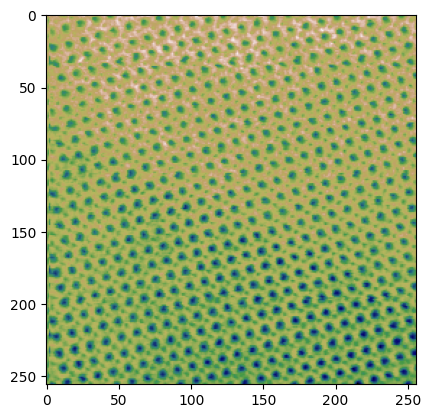

In [35]:
fig, axes = plt.subplots()
axes.imshow(bf_result.intensity.visualized)

In [36]:
point_analysis = ctx.create_point_analysis(dataset=ds, x=cx, y=cy)

In [37]:
%time point_result = ctx.run(point_analysis, progress=True)

Partitions 0/24, Frames:   0%|          | 0/65536 [00:00<?, ?it/s]

CPU times: user 128 ms, sys: 6.48 ms, total: 134 ms
Wall time: 354 ms


In [38]:
print(point_result)

[<AnalysisResult: intensity>, <AnalysisResult: intensity_log>]


In [39]:
# NBVAL_IGNORE_OUTPUT
print(point_result.intensity)

title: intensity [lin]
desc: intensity of the integration over the selected point lin-scaled
key: intensity
raw_data: [[ 9863.201  11829.065   6490.724  ...  7891.671   6461.673   6609.272 ]
 [11411.631  13569.099   7547.4136 ...  8430.884   8433.084   4680.7437]
 [10615.64   10571.748   7038.782  ... 12167.771   7040.497   7997.6006]
 ...
 [ 7091.531  11770.922   7214.841  ...  5467.903   5994.1973  6137.106 ]
 [ 7214.639  15155.479   8181.688  ...  5985.63    6306.6313  6185.5386]
 [10637.375  13987.006   5301.716  ...  4848.8687  6378.0674  6715.919 ]]
visualized: [[[ 30  84 122 255]
  [ 37 104 124 255]
  [ 17  45 119 255]
  ...
  [ 23  62 120 255]
  [ 17  43 119 255]
  [ 17  45 119 255]]

 [[ 36 101 124 255]
  [ 44 120 126 255]
  [ 21  58 120 255]
  ...
  [ 25  69 121 255]
  [ 25  69 121 255]
  [ 10  20 117 255]]

 [[ 33  92 123 255]
  [ 33  92 123 255]
  [ 19  52 119 255]
  ...
  [ 39 107 125 255]
  [ 19  52 119 255]
  [ 23  62 120 255]]

 ...

 [[ 19  52 119 255]
  [ 37 104 124 2

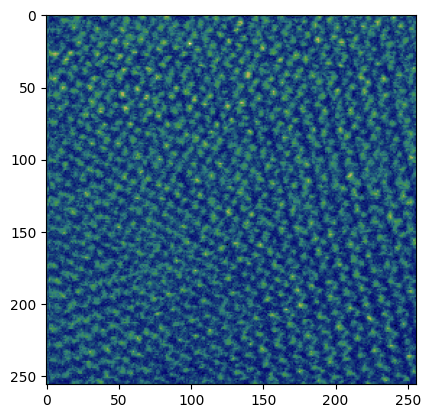

In [40]:
fig, axes = plt.subplots()
axes.imshow(point_result.intensity.visualized)

In [41]:
sum_analysis = ctx.create_sum_analysis(dataset=ds)

In [42]:
%time sum_result = ctx.run(sum_analysis, progress=True)

Partitions 0/24, Frames:   0%|          | 0/65536 [00:00<?, ?it/s]

CPU times: user 123 ms, sys: 13.7 ms, total: 136 ms
Wall time: 242 ms


In [43]:
print(sum_result)

[<AnalysisResult: intensity>, <AnalysisResult: intensity_lin>]


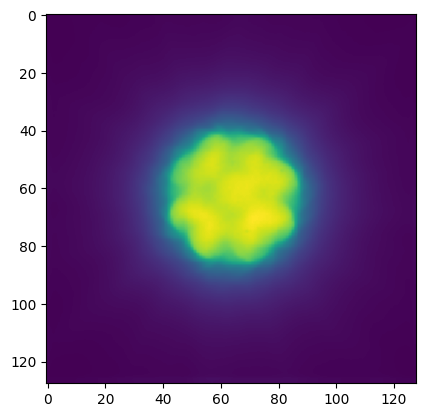

In [44]:
fig, axes = plt.subplots()
axes.imshow(sum_result.intensity.raw_data)